In [1]:
import os
# set working directory to root 
os.chdir('/home/qiangzibro/2021-math-model-code')
os.getcwd()

import pandas as pd, numpy as np
from common.io import load, load_table, load_tables, PLACES
from common.utils import remove_outlier, remove_outlier_from_multi_cols, find_pollution_columns, get_useful_features, get_useful_indexes
from common.utils import POLLUTIONS,write_excel
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# Linux上解决字体问题
plt.rcParams['font.sans-serif']= ['Noto Serif CJK JP'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False 
FIGSIZE = (12,8)
FORMAT = "pdf"

In [2]:
dfs = load_tables(PLACES)

11.438070058822632s passed


In [3]:
def plt_settings(title=None, filename=None):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title, size=20)
    if filename:
        plt.savefig(f"results/{filename}."+FORMAT, format=FORMAT)

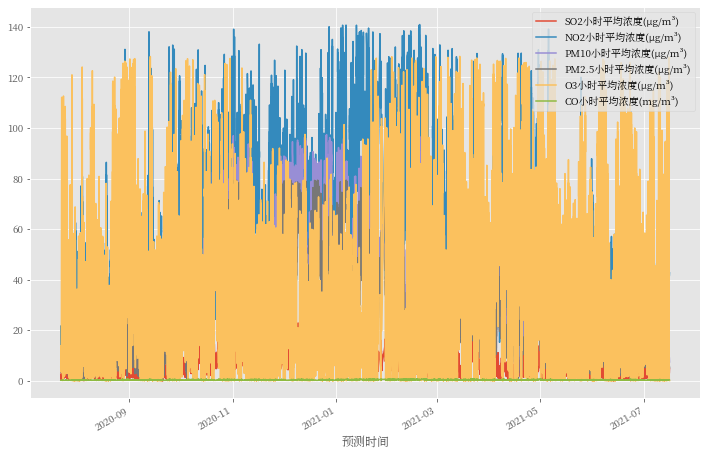

In [4]:
df = dfs['A']['0']
_ = df.plot(x='预测时间', y=find_pollution_columns(df), figsize=(12, 8))

In [5]:
dfs['A']['0'].columns,dfs['A']['1'].columns,dfs['A']['2'].columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '模型运行日期', '预测时间', '地点',
        '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）', '近地10米风速（m/s）',
        '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）', '感热通量（W/m²）',
        '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
        'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
        'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)', 'AQI'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '监测时间', '地点',
        'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
        'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
        '气压(MBar)', '风速(m/s)', '风向(°)', 'AQI'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '监测日期', '地点',
        'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
        'PM2.5监测浓度(μg/m³)', 'O3最大八小时滑动平均监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', 'AQI'],
       dtype='object'))